In [1]:
import findspark
findspark.init()

### Generalized linear regression

Contrasted with linear regression where the output is assumed to follow a Gaussian distribution, generalized linear models (GLMs) are specifications of linear models where the response variable Yi follows some distribution from the exponential family of distributions. Spark’s GeneralizedLinearRegression interface allows for flexible specification of GLMs which can be used for various types of prediction problems including linear regression, Poisson regression, logistic regression, and others. Currently in spark.ml, only a subset of the exponential family distributions are supported and they are listed below.

In [2]:
from pyspark.sql import SparkSession


In [4]:
spark = SparkSession.builder.appName("GLM").getOrCreate()

In [5]:
df = spark.read.format("libsvm").load("linearregressiondata/sample_linear_regression_data.txt")

In [6]:
from pyspark.ml.regression import GeneralizedLinearRegression

In [7]:
glr = GeneralizedLinearRegression(family="gaussian",link="identity",maxIter=10,regParam=0.4)

In [8]:
model = glr.fit(df)

In [9]:
print(model.coefficients)

[0.011517754940806584,0.790472842696679,-0.7765162432023517,2.3445626390996077,0.4952285783790079,1.1121937421556705,-0.29066362781210797,-0.4937192313655626,-0.5983826810997989,0.6652111079008689]


In [10]:
print(model.intercept)

0.14708259611153976


In [11]:
summary = glr.fit(df)

In [13]:
summary = model.summary

In [14]:
summary.tValues

[0.014556985646981891,
 0.9869432016935129,
 -0.9783218402605137,
 2.8339798039412596,
 0.6263772725652821,
 1.376426398350442,
 -0.36886126468815134,
 -0.6222754616209597,
 -0.7244923956624368,
 0.8601375741810073,
 0.3170624355222597]

In [15]:
summary.pValues

[0.9883915411218993,
 0.3241575659907814,
 0.3283979285343941,
 0.004786952596832039,
 0.5313591986876245,
 0.16931829995428638,
 0.7123904600875584,
 0.5340502038095645,
 0.4691092782880637,
 0.39013384955340924,
 0.7513312731647628]

In [16]:
summary.dispersion

105.6119122377221

In [17]:
summary.nullDeviance

53229.3654338832

In [18]:
summary.residualDegreeOfFreedom

490

In [19]:
summary.aic

3769.199210836989

In [22]:
summary.residuals().show()

+-------------------+
|  devianceResiduals|
+-------------------+
|-10.962576254585496|
| 0.8756885675820248|
|-4.5968153409793695|
| -20.40891441360814|
|-10.248494674358772|
| -6.035007505975672|
|-10.643826966839969|
|  2.113031346241665|
| 3.9498467821299634|
|-17.196001905701593|
| -4.617655184662383|
| 6.4295703799904524|
| 11.434781711755111|
|-20.695413645336263|
| -2.666891403503044|
|-16.783163829010693|
|  8.126665885543046|
|-1.4557261045503322|
|-0.6235333545821107|
|-1.1312909768193538|
+-------------------+
only showing top 20 rows



### model:2

In [2]:
from pyspark.ml.regression import GeneralizedLinearRegression as glm

In [3]:
from pyspark import SparkContext

In [4]:
from pyspark.sql import SQLContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bc=load_boston()

C:\Users\jaanu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [6]:
df_boston = pd.DataFrame(bc.data,columns = bc.feature_names)

In [7]:
df_boston['target'] = pd.Series(bc.target)
print(df_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


In [8]:
sc = SparkContext().getOrCreate()

In [9]:
sqlContext = SQLContext(sc)

In [10]:
data = sqlContext.createDataFrame(df_boston)

In [11]:
print(data.printSchema())

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- target: double (nullable = true)

None


In [12]:
features = bc.feature_names.tolist()

In [13]:
va = VectorAssembler(inputCols=features,outputCol="features")

In [14]:
va_df = va.transform(data)

In [16]:
va_df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+------+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|target|            features|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+------+--------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|  24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421|78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|  21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185|61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|  34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998|45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|  33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147|54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|  36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+------+--------------------+
only showing top 5 

In [17]:
train,test = va_df.randomSplit([0.8,0.2])

In [19]:
glr = glm(labelCol="target",family="poisson",maxIter=10,regParam=0.3)

In [20]:
model = glr.fit(train)

In [21]:
model.coefficients

DenseVector([-0.0096, 0.0015, 0.0016, 0.0144, -0.0064, 0.0611, 0.0009, -0.0335, 0.0166, -0.0008, -0.0291, 0.0006, -0.0383])

In [23]:
model.intercept

3.737063586212881

In [24]:
model.summary

Coefficients:
    Feature Estimate Std Error  T Value P Value
(Intercept)   3.7371    0.1726  21.6455  0.0000
       CRIM  -0.0096    0.0022  -4.2803  0.0000
         ZN   0.0015    0.0006   2.4150  0.0157
      INDUS   0.0016    0.0032   0.4842  0.6283
       CHAS   0.0144    0.0176   0.8158  0.4146
        NOX  -0.0064    0.0193  -0.3304  0.7411
         RM   0.0611    0.0139   4.3992  0.0000
        AGE   0.0009    0.0006   1.3749  0.1692
        DIS  -0.0335    0.0083  -4.0575  0.0000
        RAD   0.0166    0.0035   4.7627  0.0000
        TAX  -0.0008    0.0002  -4.0516  0.0001
    PTRATIO  -0.0291    0.0058  -5.0215  0.0000
          B   0.0006    0.0002   3.4367  0.0006
      LSTAT  -0.0383    0.0026 -14.6699  0.0000

(Dispersion parameter for poisson family taken to be 1.0000)
   Null deviance: 1359.9642 on 382 degrees of freedom
Residual deviance: 294.8593 on 382 degrees of freedom
AIC: 2259.6470

In [25]:
tdata = model.transform(test)

In [26]:
tdata.show(3)

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+------+--------------------+------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|target|            features|        prediction|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+------+--------------------+------------------+
|0.01311|90.0| 1.22| 0.0|0.403|7.249|21.9|8.6966|5.0|226.0|   17.9|395.93| 4.81|  35.4|[0.01311,90.0,1.2...| 31.54775481001564|
|0.02875|28.0|15.04| 0.0|0.464|6.211|28.9|3.6659|4.0|270.0|   18.2|396.33| 6.21|  25.0|[0.02875,28.0,15....|29.245374394099624|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43|58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|  28.7|[0.02985,0.0,2.18...|27.606126899002952|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+------+--------------------+------------------+
only showing top 3 rows



In [27]:
rmse = RegressionEvaluator(labelCol="target", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(tdata)
mae = RegressionEvaluator(labelCol="target", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(tdata)
r2 = RegressionEvaluator(labelCol="target", predictionCol="prediction", metricName="r2")
r2 = r2.evaluate(tdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

RMSE:  4.729007194877086
MAE:  3.083119986586535
R-squared:  0.7658448427216363


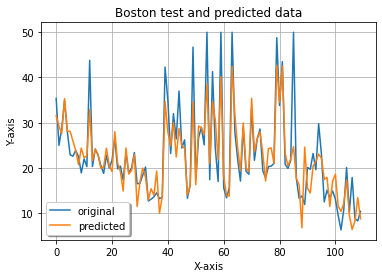

In [28]:
x_ax = range(0, tdata.count())
y_pred=tdata.select("prediction").collect()
y_orig=tdata.select("target").collect()

plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  